## Problem Statement :-
This project aims to develop a predictive model to forecast [insert specific outcome, e.g., house prices, customer churn, etc.] using machine learning techniques. By analyzing the dataset, we will identify key features and their relationships, train various algorithms, and evaluate their performance using metrics such as accuracy, precision, recall, and F1 score. Additionally, we will optimize the model through hyperparameter tuning and validate its robustness with cross-validation. The ultimate goal is to create a reliable model that provides valuable insights and accurate predictions for [insert specific outcome].


## Importing Libraries

In [3]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd                # For data manipulation and analysis
import numpy as np                 # For numerical operations
import seaborn as sns              # For data visualization
import matplotlib.pyplot as plt     # For creating plots
from sklearn.model_selection import train_test_split  # To split the dataset
from sklearn.linear_model import LinearRegression     # Example model: Linear Regression
from sklearn.tree import DecisionTreeRegressor        # Example model: Decision Tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error  # Evaluation metrics
from sklearn.model_selection import GridSearchCV       # For hyperparameter tuning
from sklearn.model_selection import cross_val_score     # For cross-validation


## Load and Exploring the Dataset

First 5 rows of the dataset:
        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null  

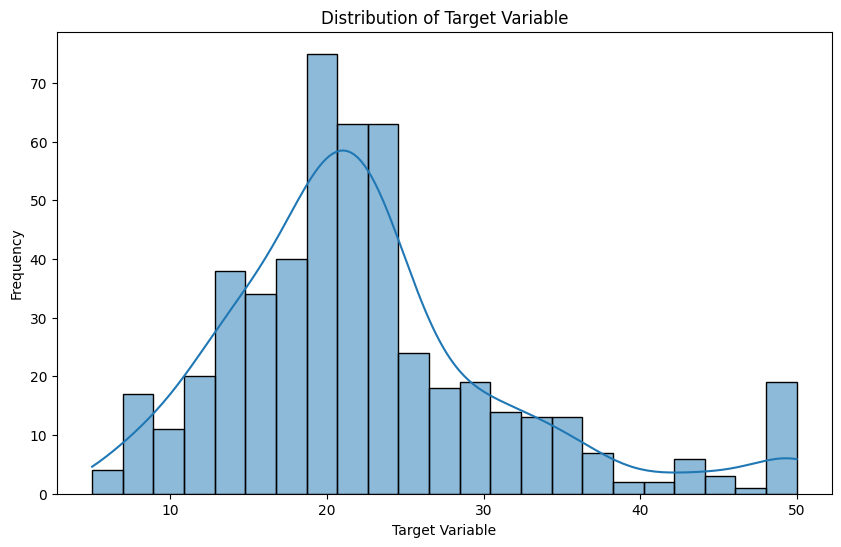

In [4]:
# Load your dataset from a URL
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'  # Replace with your dataset URL
data = pd.read_csv(url, header=None)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Display dataset information
print("\nDataset Information:")
print(data.info())

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(data[13], kde=True)  # Assuming the target variable is in the 14th column (index 13)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()


## Splitting the Data

In [5]:
# Split the data into features and target variable
X = data.drop(13, axis=1)  # Drop the target variable column (assuming index 13)
y = data[13]                # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (404, 13)
Testing set size: (102, 13)


## Training the Model

In [6]:
# Choose a model: here we are using Linear Regression as an example
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


## Evaluation of the Model

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model's performance using regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')



Mean Squared Error: 24.291119474973478
Mean Absolute Error: 3.189091965887837
R-squared: 0.6687594935356326


## Tune Hyperparameters

In [9]:
# Example: Hyperparameter tuning for Decision Tree Regressor
dt_model = DecisionTreeRegressor()

# Define the parameter grid for Grid Search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("\nBest Hyperparameters from Grid Search:")
print(grid_search.best_params_)



Best Hyperparameters from Grid Search:
{'max_depth': 20, 'min_samples_split': 2}


## Validation of the model

In [10]:
# Validate the model’s performance with cross-validation
cross_val_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=5)
print("\nCross-validation scores:", cross_val_scores)
print(f"Mean Cross-validation Score: {np.mean(cross_val_scores):.2f}")



Cross-validation scores: [ 0.64020223  0.67068789  0.59931548  0.39225391 -1.47101012]
Mean Cross-validation Score: 0.17


## Interpret Results

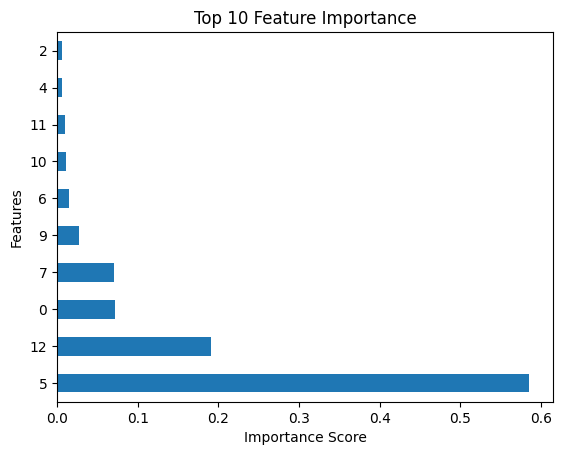

In [11]:
# Feature Importance
feature_importance = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


## Documentation

In [12]:
# Documenting the model building process in Markdown or comments
# - Model selected: Linear Regression or Decision Tree
# - Data split into training and testing sets
# - Model trained and evaluated using multiple metrics
# - Hyperparameters tuned using Grid Search
# - Cross-validation performed to ensure model generalization


## Testing the Model

In [17]:
import pandas as pd
new_data_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'

try:
    new_data = pd.read_csv(new_data_url)
    print(new_data.head())  # Display the first few rows of the dataframe
except Exception as e:
    print(f"An error occurred: {e}")



   0.00632  18.00  2.310  0  0.5380  6.5750  65.20  4.0900  1  296.0  15.30  \
0  0.02731    0.0   7.07  0   0.469   6.421   78.9  4.9671  2  242.0   17.8   
1  0.02729    0.0   7.07  0   0.469   7.185   61.1  4.9671  2  242.0   17.8   
2  0.03237    0.0   2.18  0   0.458   6.998   45.8  6.0622  3  222.0   18.7   
3  0.06905    0.0   2.18  0   0.458   7.147   54.2  6.0622  3  222.0   18.7   
4  0.02985    0.0   2.18  0   0.458   6.430   58.7  6.0622  3  222.0   18.7   

   396.90  4.98  24.00  
0  396.90  9.14   21.6  
1  392.83  4.03   34.7  
2  394.63  2.94   33.4  
3  396.90  5.33   36.2  
4  394.12  5.21   28.7  


## Reviewing and Refining the Model

In [18]:
# Review model performance based on feedback
# Potential improvements:
# - Try different algorithms
# - Collect more data
# - Feature engineering
# - Advanced hyperparameter tuning
